In [145]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns



In [146]:
# Load the  CSV file 
# Read CSV
#clinical_pd = pd.read_csv("raw_data\clinicaltrail_data.csv")
#mouse_drug_pd = pd.read_csv("raw_data\mouse_drug_data.csv")


# load the clinical CSV files 
clinicalCSV = os.path.join('raw_data', 'clinicaltrial_data.csv')

clinical_pd = pd.read_csv(clinicalCSV, encoding="iso-8859-1", low_memory=False)

clinical_pd.head()


#cleanse of any empty rows in students

clinical = clinical_pd.dropna(how="any")
clinical.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [147]:
# Load the mouse ID to drug mapping CSV file 
mouse_drugCSV = os.path.join('raw_data', 'mouse_drug_data.csv')

mouse_drug_pd = pd.read_csv(mouse_drugCSV, encoding="iso-8859-1", low_memory=False)

#mouse_drug_pd.head()

#Cleanse any empty rows. 

mouse_drug = mouse_drug_pd.dropna(how="any")
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [148]:
# Merge the 2 data using MouseID   
clinical_mouse_drug_data = pd.merge(clinical, mouse_drug, on="Mouse ID")

count = len(clinical_mouse_drug_data)

print("No. of Inner join records: %s" %(str(count)))

clinical_mouse_drug_data.head(1000)

No. of Inner join records: 1906


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [149]:
#Filter for the 4 drugs that we are interested in 

#mouse_drug_filtered = clinical_mouse_drug_data.loc[(clinical_mouse_drug_data["Drug"] == "Capomulin") | \
 #                                                  (clinical_mouse_drug_data["Drug"] == "Infubinol") | \
  #                                                 (clinical_mouse_drug_data["Drug"] == "Placebo") | \
   #                                                (clinical_mouse_drug_data["Drug"] == "Ketapril")]

#record_count = len(mouse_drug_filtered)

#print ("Mouse Records: %s" %(str(record_count)))

#mouse_drug_filtered.head(777)

#mouse_drug_filtered.reset_index(inplace=True)

#mouse_drug_filtered.head()


In [150]:
# Take only columns we need from mouse_drug for lot on Tumer volume over Time plot 
#Mouse ID	Timepoint	Tumor Volume (mm3)
reduced_mouse_drug = clinical_mouse_drug_data.loc[:, ['Drug','Timepoint','Tumor Volume (mm3)']]

reduced_mouse_drug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [151]:
# Group By Schools and Find Average reading score
#TumorVolume_ByDrug = reduced_mouse_drug.groupby("Drug") #"Timepoint")["Tumor Volume (mm3)"].mean())

#clincial_ForCapomulin = pd.DataFrame(reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Capomulin"].groupby('Timepoint')['Tumor Volume (mm3)'].mean())

#clincial_ForCapomulin.head()

clincial_ByDrug = pd.DataFrame(reduced_mouse_drug.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())

#clincial_ByDrug.head(100)

clincial_ByDrug_Updated = clincial_ByDrug.reset_index()

#clincial_ByDrug.reset
clincial_ByDrug.head(100)
#clincial_ForCapomulin.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [152]:
#clincial_ByDrug_Updated.head()

#clincial_ForCapomulin = pd.DataFrame(clincial_ByDrug_Updated[clincial_ByDrug_Updated['Drug'] == "Capomulin"])
#clincial_ByDrug.head()


#clinical_Refined = clincial_ByDrug.reset_index(level='Drug', col_level=1)

#clinical_Refined.head(10)

#clincial_ForCapomulin = pd.DataFrame(clincial_ByDrug[clincial_ByDrug['Drug'] == "Capomulin"])
                  

#clincial_ForCapomulin.head()

# Group By Drugs and Append to the cleaned up list
clinical_ForCapmoulin = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Capomulin"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Capmoulin_pd = pd.DataFrame (clinical_ForCapmoulin)

Capmoulin_pd.reset_index(inplace = True)
Capmoulin_pd.head()



Capmoulin_pd.rename(columns={"Tumor Volume (mm3)":"Capomulin"}, inplace = True)

#drug_tumor_vol = clinical_drug_tvol_data.set_index("Timepoint")

Capmoulin_pd.head()

,Timepoint,Capomulin
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325


In [153]:
# Group By Drugs and Append to the cleaned up list
clinical_ForInfubinol = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Infubinol"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Infubinol_pd = pd.DataFrame (clinical_ForInfubinol)

Infubinol_pd.reset_index(inplace = True)
Infubinol_pd.head()

Infubinol_pd.rename(columns={"Tumor Volume (mm3)":"Infubinol"}, inplace=True)

Infubinol_pd.head()

#clinical_drug_tvol_data = Capmoulin_pd.rename(columns={"Tumor Volume (mm3)":"Capomulin"})

,Timepoint,Infubinol
0,0,45.000000
1,5,47.062001
2,10,49.403909
3,15,51.296397
4,20,53.197691


In [154]:
# Group By Drugs and Append to the cleaned up list
clinical_ForKetapril = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Ketapril"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Ketapril_pd = pd.DataFrame (clinical_ForKetapril)

Ketapril_pd.reset_index(inplace = True)
Ketapril_pd.head()

Ketapril_pd.rename(columns={"Tumor Volume (mm3)":"Ketapril"}, inplace=True)

Ketapril_pd.head()



,Timepoint,Ketapril
0,0,45.000000
1,5,47.389175
2,10,49.582269
3,15,52.399974
4,20,54.920935


In [155]:
# Group By Drugs and Append to the cleaned up list
clinical_ForPlacebo = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Placebo"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Placebo_pd = pd.DataFrame (clinical_ForPlacebo)

Placebo_pd.reset_index(inplace = True)
Placebo_pd.head()

Placebo_pd.rename(columns={"Tumor Volume (mm3)":"Placebo"}, inplace=True)

Placebo_pd.head()



,Timepoint,Placebo
0,0,45.000000
1,5,47.125589
2,10,49.423329
3,15,51.359742
4,20,54.364417


In [156]:
#Merge the Different Drug Dataframes by their Timepoints and Gte final dataframe needed to make a scatter plot of 
# Tumor volume change over time 

merged_ForCapInf = pd.merge(Capmoulin_pd , Infubinol_pd, on="Timepoint")

merged_ForCapInf.head()

merged_ForKetPla = pd.merge(Ketapril_pd , Placebo_pd, on="Timepoint")

merged_ForKetPla.head()

TumorVol_OverTime = pd.merge(merged_ForCapInf, merged_ForKetPla, on="Timepoint")

TumorVol_OverTime.head(20)

clincial_ByDrug.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [157]:
# Recommended way

#sns.set_style("whitegrid")

#g = sns.lmplot(x='Timepoint', y='Capomulin',data=TumorVol_OverTime)

#sns.lmplot(x='Timepoint', , data=TumorVol_OverTime)
#g.lmplot (x ='Timepoint')
#sns.lmplot(x='Timepoint', y='Infubinol', data=TumorVol_OverTime)

#mouse_drug_filtered = clinical_mouse_drug_data.loc[(clinical_mouse_drug_data["Drug"] == "Capomulin") | \
 #                                                  (clinical_mouse_drug_data["Drug"] == "Infubinol") | \
  #                                                 (clinical_mouse_drug_data["Drug"] == "Placebo") | \
   #                                                (clinical_mouse_drug_data["Drug"] == "Ketapril")]

#clinicalDrug2 = clincial_ByDrug.reset_index()

#clinicalDrug3 = clinicalDrug2.loc[(clinical_mouse_drug_data["Drug"] == "Capomulin") | \
 #                                 (clinical_mouse_drug_data["Drug"] == "Infubinol") | \
  #                                (clinical_mouse_drug_data["Drug"] == "Placebo") | \
   #                               (clinical_mouse_drug_data["Drug"] == "Ketapril")]
#clinicalDrug3.head()

#g = sns.lmplot(x="Timepoint", y="Tumor Volume (mm3)", hue="Drug", truncate=True, size=5, data=clinicalDrug2)

# Use more informative axis labels than are provided by default
#g.set_axis_labels("Time (Days)", "Tumor Volume (mm3)")


#plt.show()

#sns.set_style("whitegrid")
#g = sns.lmplot(x="tip", y="total_bill", , data=tips,
 #aspect=2)
#>>> g = (g.set_axis_labels("Tip","Total bill(USD)").
#set(xlim=(0,10),ylim=(0,100)))
#>>> plt.title("title")
#>>> plt.show(g)

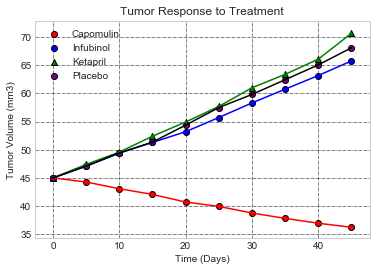

In [161]:
# Tell matplotlib to create a scatter plot based upon the above data
Capmoullin = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Capomulin"], marker="o", facecolors="red", edgecolors="black", label="Capomulin")
Infubinol  = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Infubinol"], marker="o", facecolors="blue", edgecolors="black", label="Infubinol")
Ketapril = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Ketapril"], marker="^", facecolors="green", edgecolors="black", label="Ketapril")
Placebo = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Placebo"], marker="o", facecolors="purple", edgecolors="black", label="Placebo")

# Create a title, x label, and y label for our chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# example error bar values that vary with x-position
#error = 0.2 * TumorVol_OverTime["Timepoint"]


plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Capomulin"], 0.2, color = "r")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Infubinol"], 0.2, color = "b")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Ketapril"], 0.2, color = "g")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Placebo"], 0.2, color = "k")

#plt.show()

#ax.grid(color='r', linestyle='-', linewidth=2)

plt.legend(handles=[Capmoullin, Infubinol, Ketapril, Placebo], loc="best")
plt.grid(color = 'k', linestyle='-.', linewidth=0.5)

plt.show()

#dd_handle, = plt.plot(x_axis_coaster, y_danger_drop, color='red', linewidth = 1, label="Danger Drop")
# Each point on the cosine chart is marked by a red triangle
#rg_handle, = plt.plot(x_axis_coaster, y_rail_gun, color='green', linewidth = 1, label="RailGun")



In [159]:
drug_unique = pd.DataFrame(clinical_Refined["Drug"].unique())

drug_unique.head()

,0
0,Capomulin
1,Ceftamin
2,Infubinol
3,Ketapril
4,Naftisol


In [160]:
#clinical_df = []
#for drug in drug_unique:
    
#family_and_generosity = happiness_df.sort_values(["Family","Generosity"], ascending=False)
#family_and_generosity.head()